# Capstone Week 3
---

# Index
- [Capstone Objectives](#Capstone-Objectives)
- [Read in Data](#Read-in-Data)
    - [Merge 2018 and 2019](#Merge-2018-and-2019)
    - [Make advisor dictionary mapper](#Make-advisor-dictionary-mapper)
- [Data Cleaning](#Data-Cleaning)
    - [Custom Cleaning Functions](#Custom-Cleaning-Functions)
    - [Create Cleaning Pipeline](#Create-Cleaning-Pipeline)
- [Model building](#Model-building)
- [Make predictions](#Make-predictions)
- [Model persistance](#Model-persistance)
- [Residuals](#Residuals)
- [Model Interpretation](#Model-Interpretation)

# Capstone Objectives
- Assist sales and marketing by improving their targeting
- Predict sales for 2019 using the data for 2018

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 50)

[Back to Top](#Index)
# Read in Data

In [2]:
df18 = pd.read_excel("../Transaction Data.xlsx", sheet_name="Transactions18")
df19 = pd.read_excel("../Transaction Data.xlsx", sheet_name="Transactions19")

## Merge 2018 and 2019

In [3]:
df = pd.merge(
    df18, 
    df19, 
    on='CONTACT_ID',
    suffixes=['_2018', '_2019']
)
print(df.shape)

(10005, 41)


In [4]:
df.head()

,CONTACT_ID,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M_2018,redemption_curr,redemption_12M,new_Fund_added_12M_2018,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,refresh_date_2018,sales_12M_2019,new_Fund_added_12M_2019,refresh_date_2019
0,0047433,21.0,38.0,NaN,1.0,5.0,5.0,NaN,1.0,2.0,2.0,NaN,1.0,8.0,1.0,237480.11,250.0,19682.0,-1496.745,-102496.165,NaN,-47342.32,284737.93,84.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122866.04,114614.07,0.0,0.0,2018-12-31,18633.105,NaN,2019-12-31
1,4461312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,19629.00,NaN,NaN,NaN,NaN,NaN,0.00,19629.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19629.00,0.00,0.0,0.0,2018-12-31,NaN,NaN,2019-12-31
2,4491079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1758.70,NaN,NaN,NaN,NaN,NaN,0.00,1758.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1758.70,0.00,0.0,0.0,2018-12-31,NaN,NaN,2019-12-31
3,0107408,20.0,NaN,2.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,57943.00,5459.0,52484.0,NaN,NaN,1.0,0.00,0.00,57943.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57943.00,0.00,0.0,0.0,2018-12-31,93212.000,1.0,2019-12-31
4,85101140503769936458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8573.59,NaN,NaN,NaN,NaN,NaN,-8573.59,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8573.59,0.00,0.0,0.0,2018-12-31,NaN,NaN,2019-12-31


## Make advisor dictionary mapper

In [5]:
adviser_lookup = {idx: contact_id for idx, contact_id in enumerate(df['CONTACT_ID'])}

In [6]:
adviser_lookup[123]

'85201142414218755394'

[Back to Top](#Index)
# Data Cleaning

In [7]:
# make a variable to keep all of the columns we want to drop
COLS_TO_DROP = [
    'refresh_date_2019', 'refresh_date_2018', 'CONTACT_ID', 
]

COLS_TO_KEEP = [
    'no_of_sales_12M_1', 'no_of_Redemption_12M_1', 'no_of_sales_12M_10K',
    'no_of_Redemption_12M_10K', 'no_of_funds_sold_12M_1',
    'no_of_funds_redeemed_12M_1', 'no_of_fund_sales_12M_10K',
    'no_of_funds_Redemption_12M_10K', 'no_of_assetclass_sold_12M_1',
    'no_of_assetclass_redeemed_12M_1', 'no_of_assetclass_sales_12M_10K',
    'no_of_assetclass_Redemption_12M_10K', 'No_of_fund_curr',
    'No_of_asset_curr', 'AUM', 'sales_curr', 'sales_12M_2018',
    'redemption_curr', 'redemption_12M', 'new_Fund_added_12M_2018',
    'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
    'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
    'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
    'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
    'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT'
]

In [8]:
X = df.drop(['sales_12M_2019', 'new_Fund_added_12M_2019'], axis=1)
y = df['sales_12M_2019']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

## Custom Cleaning Functions

In [10]:
def extract_columns(df):
    '''extract out columns not listed in COLS_TO_DROP variable'''
    cols_to_keep = [col for col in df.columns if col not in COLS_TO_DROP]
    return df.loc[:, cols_to_keep].copy()


def fillna_values(df):
    '''fill nan values with zero'''
    if isinstance(df, type(pd.Series(dtype='float64'))):
        return df.fillna(0)
    elif isinstance(df, type(pd.DataFrame())):
        num_df = df.select_dtypes(include=['number']).fillna(0)
        non_num_df = df.select_dtypes(exclude=['number'])
        return pd.concat([num_df, non_num_df], axis=1)
    else:
        return np.nan_to_num(df)

In [11]:
# fillna_values.transform(X_train)

[Back to Top](#Index)
## Create Cleaning Pipeline

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [13]:
extract_columns_trans = FunctionTransformer(extract_columns)
fillna_values_trans = FunctionTransformer(fillna_values)

Make pipeline for target variable

In [14]:
targ_pipe = Pipeline([
    ('fillna_values_trans', fillna_values_trans),
#     ('negative_value_trans', negative_value_trans)
])

In [15]:
y_train = targ_pipe.fit_transform(y_train.values.reshape(-1,1)) # fit and transform TRAINING

In [16]:
y_train = pd.Series(y_train.flatten(), index=X_train.index)

In [17]:
y_test = pd.Series(targ_pipe.transform(y_test.values.reshape(-1,1)).flatten(), index=X_test.index) # transform only TESTING

In [18]:
y_test

2052         0.000
2758      5055.190
4334         0.000
9047    100777.230
7001     22500.000
           ...    
5527         0.000
3619         0.000
9819    372569.315
7303         0.000
2840     97081.830
Length: 2502, dtype: float64

Make pipeline for features

In [19]:
feat_pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('StandardScaler', StandardScaler()),
])

In [20]:
train_array = feat_pipe.fit(X_train, y_train).transform(X_train)
train_array[:2]

array([[-0.13132686, -0.10041755, -0.21064088, -0.19865712, -0.15343695,
        -0.62678711, -0.43000009, -0.44180383,  0.20146207, -0.86803317,
        -0.53463025, -0.5620389 , -0.37248773,  0.06554336, -0.0889493 ,
        -0.08324658, -0.15460596,  0.09041682,  0.15624596,  0.43684362,
        -0.02649335, -0.07060094, -0.05980054, -0.01245516, -0.02380215,
        -0.04182124, -0.03765524, -0.04000228, -0.07036559, -0.03062799,
        -0.09354653, -0.01848494, -0.0563512 , -0.05793289, -0.01655909,
        -0.07003327],
       [ 0.06459803, -0.06813442, -0.21064088, -0.08744056,  1.9542844 ,
         1.39940146, -0.43000009,  0.29680003,  1.18812652,  1.03436288,
        -0.53463025,  0.77753476,  3.17786794,  1.01858956, -0.12450774,
        -0.08221872, -0.13964123,  0.09041682,  0.07167552,  3.84838427,
         0.05015345, -0.16682196, -0.05980054, -0.01245516, -0.02380215,
        -0.04182124, -0.03765524,  0.04765053,  1.12151599, -0.03062799,
        -0.09354653, -0.01848

Convert the preprocessed numpy array back to pandas dataframe

In [21]:
X_train_prepared = pd.DataFrame(
    train_array,
    index=X_train.index,
    columns=COLS_TO_KEEP
)

In [22]:
X_train_prepared.head()

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M_2018,redemption_curr,redemption_12M,new_Fund_added_12M_2018,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT
4081,-0.131327,-0.100418,-0.210641,-0.198657,-0.153437,-0.626787,-0.430000,-0.441804,0.201462,-0.868033,-0.534630,-0.562039,-0.372488,0.065543,-0.088949,-0.083247,-0.154606,0.090417,0.156246,0.436844,-0.026493,-0.070601,-0.059801,-0.012455,-0.023802,-0.041821,-0.037655,-0.040002,-0.070366,-0.030628,-0.093547,-0.018485,-0.056351,-0.057933,-0.016559,-0.070033
184,0.064598,-0.068134,-0.210641,-0.087441,1.954284,1.399401,-0.430000,0.296800,1.188127,1.034363,-0.534630,0.777535,3.177868,1.018590,-0.124508,-0.082219,-0.139641,0.090417,0.071676,3.848384,0.050153,-0.166822,-0.059801,-0.012455,-0.023802,-0.041821,-0.037655,0.047651,1.121516,-0.030628,-0.093547,-0.018485,-0.160696,-0.158246,-0.016559,3.269629
186,-0.170512,-0.100418,-0.024389,-0.198657,-0.153437,-0.626787,0.320475,-0.441804,0.201462,-0.868033,0.857226,-0.562039,-0.049728,0.065543,1.167409,-0.083366,0.354063,0.090417,0.156246,-0.416042,3.035922,-0.081085,-0.059801,-0.012455,-0.689998,-0.041821,-0.037655,-0.040360,-0.075230,-0.030628,-0.093547,-0.018485,-0.067053,2.378954,-0.016559,-0.070033
230,0.211542,-0.035851,-0.117515,-0.087441,-0.153437,0.183688,0.320475,0.296800,0.201462,1.034363,0.857226,0.777535,-0.049728,0.065543,-1.274321,-0.083366,-0.077698,0.090417,-0.110813,-0.416042,0.007861,-1.473199,-0.059801,-0.012455,-0.023802,-0.311608,-0.037655,-0.040360,-0.075230,-0.030628,-0.093547,-0.018485,-0.099222,-2.348109,-0.016559,1.402720
6327,-0.199901,-0.095806,-0.210641,-0.198657,-0.574981,-0.221549,-0.430000,-0.441804,-0.785202,0.083165,-0.534630,-0.562039,-0.695247,-0.887503,-0.113285,-0.083366,-0.154761,0.090417,0.151123,-0.416042,-0.029084,-0.097721,-0.059801,-0.012455,-0.023802,-0.041821,-0.037655,-0.040360,-0.075230,-0.030628,-0.093547,-0.018485,-0.085364,-0.057933,-0.016559,-0.070033


**TRANSFORM** the test set (Do NOT fit the pipeline on testing!)

In [23]:
X_test_prepared = pd.DataFrame(
    feat_pipe.transform(X_test),
    index=X_test.index,
    columns=COLS_TO_KEEP
)

In [24]:
X_test_prepared.head()

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M_2018,redemption_curr,redemption_12M,new_Fund_added_12M_2018,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT
2052,-0.199901,-0.095806,-0.210641,-0.087441,-0.574981,-0.221549,-0.430000,0.296800,-0.785202,0.083165,-0.534630,0.777535,-0.372488,0.065543,-0.262627,-0.083366,-0.154761,-0.569226,0.096033,-0.416042,-0.518428,-0.081085,-0.059801,-0.012455,-0.023802,6.485925,-0.037655,-0.04036,-0.07523,-0.030628,-0.093547,-0.018485,-0.263819,-0.057933,-0.016559,-0.070033
2758,-0.160716,-0.049687,-0.210641,-0.198657,-0.153437,0.588926,-0.430000,-0.441804,0.201462,1.034363,-0.534630,-0.562039,-0.695247,-0.887503,-0.103511,-0.081921,-0.153989,0.090417,0.146670,-0.416042,-0.036794,-0.081085,-0.067561,-0.012455,-0.023802,-0.041821,-0.037655,-0.04036,-0.07523,-0.030628,-0.093547,-0.018485,-0.073685,-0.057933,-0.016559,-0.070033
4334,-0.199901,-0.100418,-0.210641,-0.198657,-0.574981,-0.626787,-0.430000,-0.441804,-0.785202,-0.868033,-0.534630,-0.562039,-0.372488,0.065543,-0.094480,-0.083366,-0.154761,0.090417,0.156246,-0.416042,-0.024506,-0.081437,-0.041550,-0.012455,-0.020072,-0.041821,-0.037655,-0.04036,-0.07523,-0.030628,-0.093547,-0.018485,-0.062893,-0.057933,-0.016559,-0.070033
9047,0.113579,0.051774,-0.210641,-0.198657,0.689652,0.588926,-0.430000,-0.441804,1.188127,1.034363,-0.534630,-0.562039,-0.049728,0.065543,-0.097632,-0.072066,-0.135643,0.090143,0.145206,-0.416042,-0.012209,-0.087769,-0.060468,-0.012455,-0.023802,-0.041821,-0.037655,-0.04036,-0.07523,-0.030628,-0.093547,-0.018485,-0.066659,-0.057933,-0.016559,-0.070033
7001,0.005821,0.176295,-0.117515,0.246209,-0.153437,1.399401,0.320475,1.774008,0.201462,1.034363,0.857226,2.117108,0.273031,0.065543,-0.099338,-0.083366,-0.078773,0.071092,-0.190393,-0.416042,-0.035326,-0.081908,-0.038289,-0.012455,-0.023802,-0.041821,-0.037655,-0.04036,-0.07523,-0.030628,-0.093547,-0.018485,-0.068699,-0.057933,-0.016559,-0.070033


[Back to Top](#Index)
# Model building

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb

In [27]:
import lightgbm as lgb

Perhaps try:

- Feature and target variable transformations
    - Log transform skewed columns
    - [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) to remove noise and reduce dimensionality

In [30]:
feat_pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('StandardScaler', StandardScaler()),
    ('select', SelectFromModel(DecisionTreeRegressor())),
    ('forest', RandomForestRegressor()),
])

In [31]:
feat_pipe.fit(X_train, y_train)

Pipeline(steps=[('extract_columns_trans',
                 FunctionTransformer(func=<function extract_columns at 0x11fca1940>)),
                ('fillna_values_trans',
                 FunctionTransformer(func=<function fillna_values at 0x11fca11f0>)),
                ('StandardScaler', StandardScaler()),
                ('select', SelectFromModel(estimator=DecisionTreeRegressor())),
                ('forest', RandomForestRegressor())])

[Back to Top](#Index)
# Make predictions

In [32]:
from sklearn.model_selection import cross_validate

In [33]:
cross_validate(feat_pipe, X_train, y_train)

{'fit_time': array([2.33108783, 2.08628607, 1.87297297, 1.24200869, 1.54488993]),
 'score_time': array([0.05742502, 0.04144001, 0.03792596, 0.03523612, 0.04830694]),
 'test_score': array([0.34843424, 0.30224115, 0.19333757, 0.31135006, 0.40043573])}

In [39]:
feat_pipe.named_steps['select'].estimator_.feature_importances_

array([3.32757038e-02, 9.14844725e-03, 2.03137282e-02, 1.94318247e-02,
       9.83620864e-04, 5.08363471e-03, 1.33733987e-03, 6.08912352e-03,
       5.11489995e-04, 5.72902232e-04, 2.89736147e-04, 9.98700007e-03,
       1.39446851e-02, 2.63289509e-04, 7.84068088e-02, 4.48750389e-02,
       2.30024098e-01, 5.19909339e-02, 1.05156781e-02, 7.75073693e-02,
       1.25717510e-02, 1.05114995e-02, 4.69926085e-03, 0.00000000e+00,
       1.27576660e-02, 2.17185528e-04, 2.26756182e-05, 8.97621487e-03,
       2.91001654e-03, 0.00000000e+00, 1.97884568e-02, 6.71241129e-05,
       2.97301357e-01, 1.32001144e-02, 6.69850498e-05, 2.35723973e-03])

In [40]:
#  make regression predictions
y_train_preds = feat_pipe.predict(X_train_prepared)
y_test_preds = feat_pipe.predict(X_test_prepared)

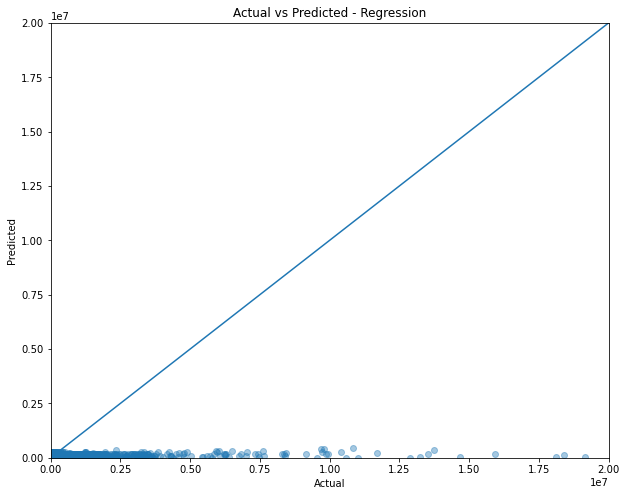

In [41]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.scatter(x=y_train, y=y_train_preds, alpha=0.4)
ax.plot([0, 20000000], [0,20000000])
ax.set_xlim([0, 20000000])
ax.set_ylim([0, 20000000])
ax.set_title("Actual vs Predicted - Regression")
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted");

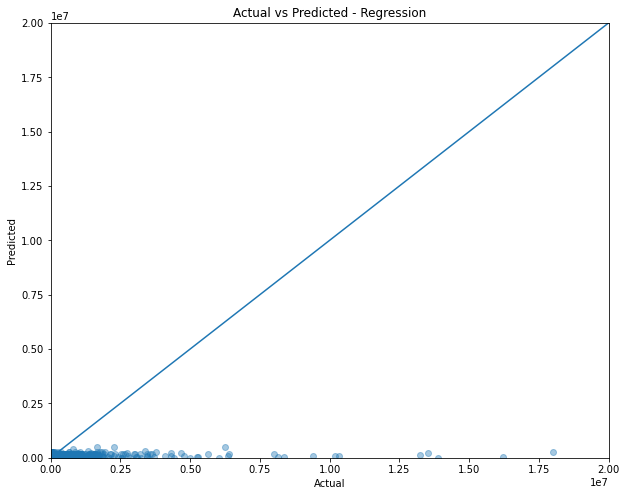

In [42]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.scatter(x=y_test, y=y_test_preds, alpha=0.4)
ax.plot([0, 20000000], [0,20000000])
ax.set_xlim([0, 20000000])
ax.set_ylim([0, 20000000])
ax.set_title("Actual vs Predicted - Regression")
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted");

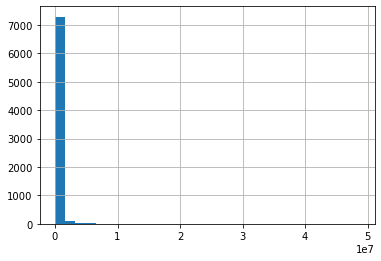

In [43]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
y_train.hist(bins=30, ax=ax);

In [54]:
y_train.describe()

count    7.503000e+03
mean     2.145814e+05
std      1.209152e+06
min     -1.495182e+04
25%      0.000000e+00
50%      1.224400e+02
75%      4.502168e+04
max      4.867638e+07
dtype: float64

Theres a negative value in the target variable. Add a step to the `targ_pipe` do deal with negative values.`

In [52]:
y_train_log = targ_pipe.transform(np.log(y_train+1))

/Users/carletonsmith/miniconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


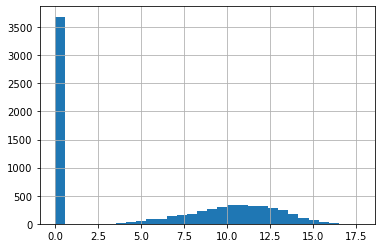

In [47]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
y_train_log.hist(bins=30, ax=ax);

In [55]:
# y_train_logpred = feat_pipe.fit(X_train_prepared, y_train_log)

In [51]:
y_train_log[y_train_log.isnull()]

6646   NaN
6713   NaN
dtype: float64

[Back to Top](#Index)
# Model persistance

In [67]:
feat_pipe

Pipeline(steps=[('extract_columns_trans',
                 FunctionTransformer(func=<function extract_columns at 0x11fca1940>)),
                ('fillna_values_trans',
                 FunctionTransformer(func=<function fillna_values at 0x11fca11f0>)),
                ('StandardScaler', StandardScaler()),
                ('select', SelectFromModel(estimator=DecisionTreeRegressor())),
                ('forest', RandomForestRegressor())])

In [61]:
import pickle

In [69]:
ls -la

total 67008
drwxr-xr-x   5 carletonsmith  staff       160 Oct 29 07:09 ./
drwxr-xr-x  12 carletonsmith  staff       384 Oct 28 17:21 ../
drwxr-xr-x   3 carletonsmith  staff        96 Oct 28 17:24 .ipynb_checkpoints/
-rw-r--r--   1 carletonsmith  staff    232753 Oct 29 07:09 Week-3.ipynb
-rw-r--r--   1 carletonsmith  staff  34071376 Oct 29 07:08 first_model.pkl


In [72]:
rf2 = RandomForestRegressor()

In [73]:
rf2.fit(X_train_prepared, y_train)

RandomForestRegressor()

In [76]:
with open('first_model.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(rf2, f)

In [77]:
with open('first_model.pkl', 'rb') as f:
    rf_new = pickle.load(f)

In [79]:
rf_new.predict(X_test_prepared)

array([168294.91148373,  12588.0795974 ,   6745.5634    , ...,
        80605.90764671,   9198.441288  , 185725.60425051])

[Back to Top](#Index)
# Residuals

In [56]:
# get residuals
residuals = y_test_preds - y_test

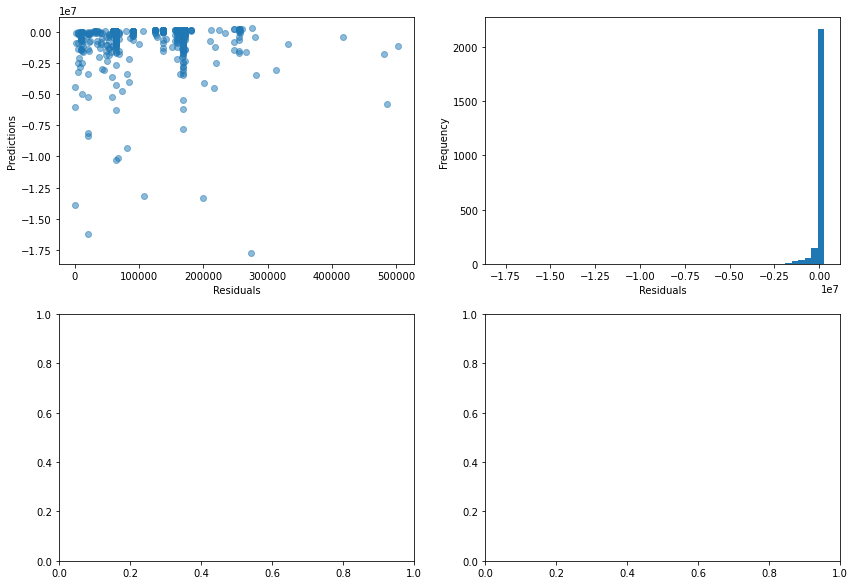

In [57]:
# plot predictions vs residuals
fig, axes = plt.subplots(2,2,figsize=(14,10))

# plot scatter on upper right plot
axes[0,0].scatter(x=y_test_preds, y=residuals, alpha=0.5)
axes[0,0].set(xlabel="Residuals",ylabel="Predictions");

# plot hist on upper left plot
axes[0,1].hist(residuals, bins=50)
axes[0,1].set(xlabel='Residuals', ylabel='Frequency');

In [58]:
from statsmodels.api import qqplot

In [59]:
axes[1,0].set_ylim([-3.5, 3.5])
axes[1,0].set_xlim([-3.5, 3.5])

(-3.5, 3.5)

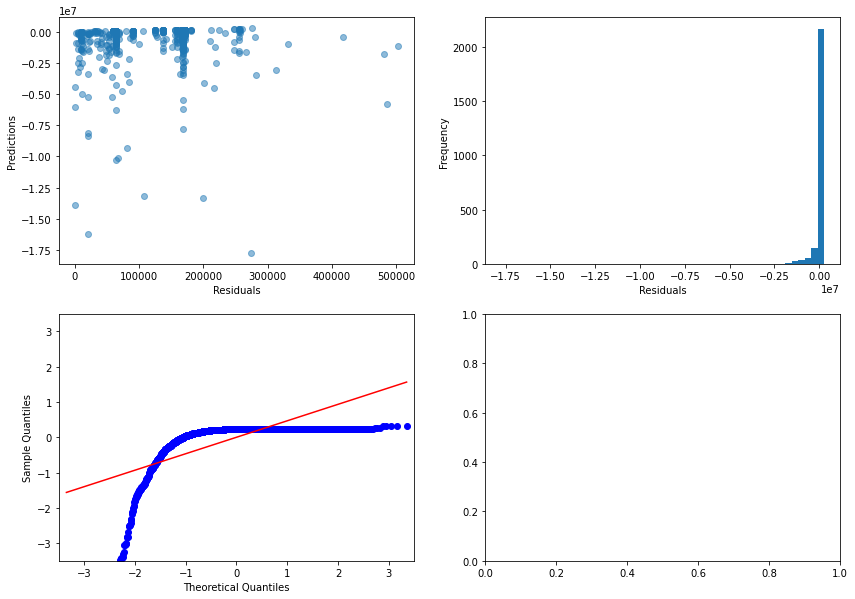

In [60]:
qqplot(residuals, fit=True, line='r', ax=axes[1,0])

[Back to Top](#Index)
# Model Interpretation

# Scratch Work

In [ ]:
param_grid = {
    'select__estimator': [Ridge(), RandomForestRegressor(), xgb.XGBRegressor()],
    'select__max_features': [2, 5, 7, 9, 11, 13],
    'forest__n_estimators': [25, 50, 75, 100, 150, 200],
    'forest__max_features': ['sqrt', 'log2'],
}

In [ ]:
rs = RandomizedSearchCV(
    feat_pipe, 
    param_distributions=param_grid,
    cv=3,
    verbose=2
)

In [ ]:
rs.fit(feat_pipe, X_train, y_train)